<a href="https://colab.research.google.com/github/hajartawfiq/deep-labs/blob/main/deeplab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools as it

In [2]:
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

(-0.1, 1.15)

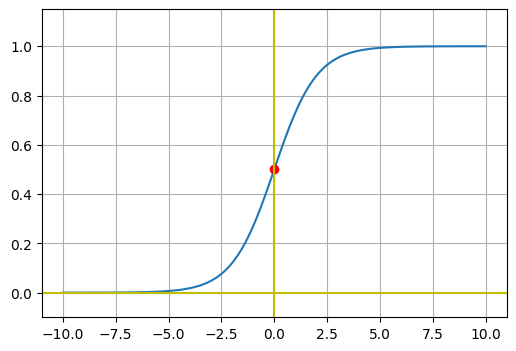

In [3]:
# Plot The sigmoid function
xs = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(xs)

fig = plt.figure(figsize=(6,4))
plt.plot(xs, activation)
plt.plot(0,.5,'ro')

plt.grid(True, which='both')
plt.axhline(y=0, color='y')
plt.axvline(x=0, color='y')
plt.ylim([-0.1, 1.15])

In [4]:
# Logic gate function
def logic_gate(w1, w2, b, x1, x2):
  ''' logic_gate is a function which returns the results of
        taking two args and  (hopefully) acts like a logic gate (and/or/not/etc.).
        its behavior is determined by w1,w2,b. '''
  return sigmoid(w1 * x1 + w2 * x2 + b)

In [5]:
# Test function that takes a function with two arguments
def test_gate(w1, w2, b):
  for x1 in range(2):
    for x2 in range(2):
      print("{}, {}: {}".format(x1, x2, np.round(logic_gate(w1, w2, b, x1, x2))))

In [10]:
OR_gate = test_gate(20, 20, -10)


0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


In [7]:
def logic_gate(w1, w2, b, x1, x2):
  return sigmoid(w1 * x1 + w2 * x2 + b)

In [8]:
def test_gate(w1, w2, b):
  for x1 in range(2):
    for x2 in range(2):
      print("{}, {}: {}".format(x1, x2, np.round(logic_gate(w1, w2, b, x1, x2))))

In [11]:
AND_gate = test_gate(20, 20, -30)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


In [13]:
NOR_gate = test_gate(-20, -20, 10)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


In [14]:
NAND_gate = test_gate(-20, -20, 30)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


In [30]:
def XOR(x1, x2):
    # XOR = AND (OR ,NAND)
    NAND_out = logic_gate(-20, -20, 30, x1, x2)
    OR_out = logic_gate(20, 20, -10, x1, x2)
    XOR_out = logic_gate(20, 20, -30, np.round(NAND_out), np.round(OR_out))

    return np.round(XOR_out)

In [29]:
def test_XOR():
    for x1 in range(2):
        for x2 in range(2):
            print("{}, {}: {}".format(x1, x2, XOR(x1, x2)))

test_XOR()

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0
